In [1]:
# Kütüphaneleri içe aktarma 
import tensorflow as tf 
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt  
import pathlib 
import random
from PIL import Image
import cv2

In [2]:
# Path getirme
os.getcwd()

'C:\\Users\\ibrah\\OneDrive\\Masaüstü\\final_odevi'

In [3]:
# Dizinleri listeleme.
os.listdir()

['.ipynb_checkpoints', 'Dataset_BUSI_with_GT', 'final_odevi.ipynb']

In [4]:
# veri_listesi 
veri_listesi = pathlib.Path(os.listdir()[1])
veri_listesi 

WindowsPath('Dataset_BUSI_with_GT')

In [5]:
# Alt dizin veya klasör isimleri
sinif_listesi = os.listdir(veri_listesi)
print(f"Öğelerin listesi : {sinif_listesi}")

Öğelerin listesi : ['benign', 'malignant', 'normal']


In [6]:
# Oluşturulan veri_listesi Path'ine alt klasörlerimizi tanımlıyoruz
benign = os.path.join(veri_listesi,sinif_listesi[0])
malignant = os.path.join(veri_listesi,sinif_listesi[1])
normal = os.path.join(veri_listesi,sinif_listesi[2])    

In [7]:
print(f"bening klasörü yolu: {benign}")
print(f"malignant klasörü yolu: {malignant}")
print(f"normal klasörü yolu: {normal}")

bening klasörü yolu: Dataset_BUSI_with_GT\benign
malignant klasörü yolu: Dataset_BUSI_with_GT\malignant
normal klasörü yolu: Dataset_BUSI_with_GT\normal


In [8]:
# veri_listesinde bulunan toplam görüntü sayısı
toplam = 0
for goruntu in veri_listesi.glob("*/*.png"):
    toplam+=1
print(f"Toplam görüntü sayısı: {toplam}")

Toplam görüntü sayısı: 1578


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
benign= "Dataset_BUSI_with_GT"
benign_path =  "Dataset_BUSI_with_GT/benign" 
datagen = ImageDataGenerator(
    rotation_range=45,
    height_shift_range=0.05,
    width_shift_range=0.05,
    zoom_range=0.1
)
i=0

for batch in datagen.flow_from_directory(benign,save_to_dir=benign_path, batch_size=1,color_mode= 'grayscale',save_format="png", save_prefix="benign"):
    i+=1
    if i>10:
        break

Found 1578 images belonging to 3 classes.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
malignant= "Dataset_BUSI_with_GT"
malignant_path =  "Dataset_BUSI_with_GT\\malignant" 
datagen = ImageDataGenerator(
    rotation_range=45,
    height_shift_range=0.05,
    width_shift_range=0.05,
    zoom_range=0.1
)
i=0
for batch in datagen.flow_from_directory(malignant, batch_size=1,color_mode= 'grayscale',save_to_dir=malignant_path, save_format="png", save_prefix="malignant"):
    i+=1
    if i>10:
        break

Found 1589 images belonging to 3 classes.


In [11]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

normal= "Dataset_BUSI_with_GT"
normal_path =  "Dataset_BUSI_with_GT\\normal" 
datagen = ImageDataGenerator(
    rotation_range=45,
    height_shift_range=0.05,
    width_shift_range=0.05,
    zoom_range=0.1
)

i=0
for batch in datagen.flow_from_directory(normal, batch_size=1,color_mode= 'grayscale',save_to_dir=normal_path, save_format="png", save_prefix="normal"):
    i+=1
    if i>10:
        break

Found 1600 images belonging to 3 classes.


In [12]:
# veri_listesinde bulunan toplam görüntü sayısı
toplam = 0
for goruntu in veri_listesi.glob("*/*.png"):
    toplam+=1
print(f"Toplam görüntü sayısı: {toplam}")

Toplam görüntü sayısı: 1611


In [13]:
from pathlib import Path 
import imghdr

veri_listesi = os.listdir()[1] # veri yolu
goruntu_uzantilari = [".png", ".jpg"]  # görüntü uzantılarımızı goruntu_uzantilarina atıyoruz

istenilen_dosya_uzantilari = ["bmp", "gif", "jpeg", "png"] # modele girmesini istediğimiz görüntü uzantıları
for dosya_yolu in Path(veri_listesi).rglob("*"): #rglob "*" alt dizinlerin hepsini alır
    if dosya_yolu.suffix.lower() in goruntu_uzantilari:
        goruntu_turu = imghdr.what(dosya_yolu) # dosya türünün tespit edilmesi resim dosyası olup olmadığını bulma
        if goruntu_turu is None: 
            print(f"{dosya_yolu} bu dosya uzantısı istenilen dosya uzantısıyla aynı değildir.")
        elif goruntu_turu not in istenilen_dosya_uzantilari:
            print(f"{dosya_yolu} ve {goruntu_turu}, kabul edilmiyor.")

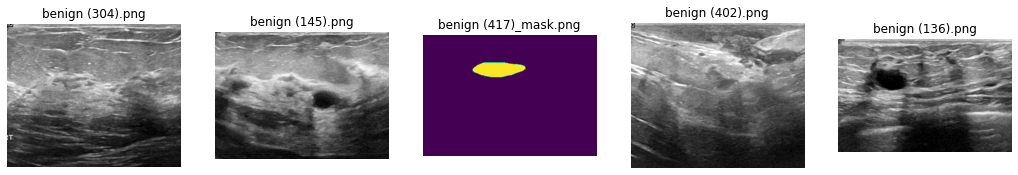

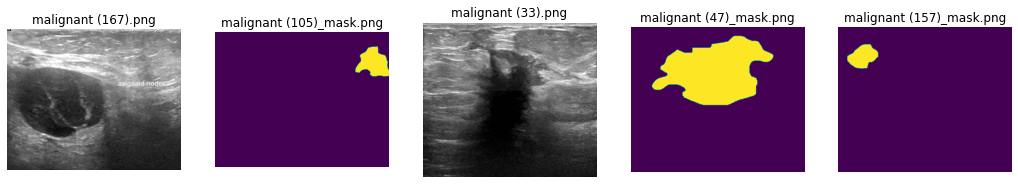

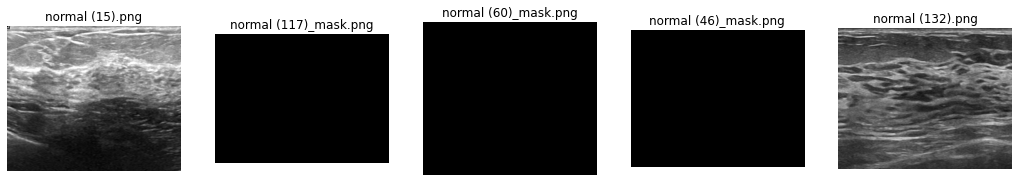

In [14]:
# "benign, malignant ve normal" dizinlerinden rastgele 3 adet görüntüsünü alma
# Dizin yolu
dizin_yol = "C:\\Users\\ibrah\\OneDrive\\Masaüstü\\final_odevi"+"\\"+os.listdir()[1]  # Dizin yolunu uygun şekilde güncelleyin

# Tüm alt dizinleri al
alt_dizin_listesi = [d for d in os.listdir(dizin_yol) if os.path.isdir(os.path.join(dizin_yol, d))]

# Her bir alt dizin için işlem yap
for alt_dizin in alt_dizin_listesi:
    # Alt dizinin yolu
    alt_dizin_yolu = os.path.join(dizin_yol, alt_dizin)
    
    # Alt dizin içindeki tüm resimleri al
    resim_dosyalari = [f for f in os.listdir(alt_dizin_yolu) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Rastgele 3 resim seç
    resim_secimi = random.sample(resim_dosyalari, min(5, len(resim_dosyalari)))

    # 3x3 lük tablo
    fig, axes = plt.subplots(1, 5, figsize=(18, 18))

    for i, resim_dosyasi in enumerate(resim_secimi):
        # Resmin yolu
        resim_yolu = os.path.join(alt_dizin_yolu, resim_dosyasi)

        # Resmi çiz
        resim = plt.imread(resim_yolu)
        axes[i].imshow(resim)
        axes[i].set_title(resim_dosyasi)
        axes[i].axis('off')

    plt.show()

In [15]:
# Görüntülere numerik etiketler verme
import cv2
etiketler = []
resim_dosyasi = []

# Dizin üzerinde yineleme
for ad in os.listdir(veri_listesi):
    sinif_yol = os.path.join(veri_listesi, ad)
    for dosya_ismi in os.listdir(sinif_yol):
        resim_yol = os.path.join(sinif_yol, dosya_ismi)
        resim_dizisi = cv2.imread(resim_yol) 
        resim_dizisi = cv2.resize(resim_dizisi,(224,224))
        resim_dosyasi.append(resim_dizisi)
        etiketler.append(ad)

In [16]:
# LabelEncoder()
from sklearn.preprocessing import LabelEncoder

# Etiketleri numerik değerlere dönüştürme
label_encoder = LabelEncoder()
etiketler = label_encoder.fit_transform(etiketler)
# Get the original class labels from the label encoder
orijinal_etiketler = label_encoder.classes_

# Numerik Değerleri ve Orijinal Etiketleri yazdırma
for numerik_degerler, orijinal_etiket in enumerate(orijinal_etiketler):
    print(f"Numerik Değerler: {numerik_degerler}, Orijinal Etiket: {orijinal_etiket}")

Numerik Değerler: 0, Orijinal Etiket: benign
Numerik Değerler: 1, Orijinal Etiket: malignant
Numerik Değerler: 2, Orijinal Etiket: normal


In [17]:
# Verileri diziye aktarma
resim_dosyasi = np.array(resim_dosyasi)
etiketler = np.array(etiketler)

In [18]:
print(resim_dosyasi.shape)
print(etiketler.shape)

(1611, 224, 224, 3)
(1611,)


In [19]:
num_ornekler, yukseklik, genislik, kanal = resim_dosyasi.shape
resim_dosyasi = resim_dosyasi.reshape(num_ornekler, -1)

In [20]:
# Tahmin ve test değerlerini ayırma
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(resim_dosyasi, etiketler, test_size=0.20, random_state=42)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1288 1288
323 323


In [21]:
# Rastgele Orman Sınıflandırması
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Doğruluk:  0.7647058823529411 

Sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       191
           1       0.70      0.52      0.60        77
           2       0.91      0.58      0.71        55

    accuracy                           0.76       323
   macro avg       0.79      0.67      0.71       323
weighted avg       0.77      0.76      0.75       323
 

Karışıklık Matriksi:  
 [[175  13   3]
 [ 37  40   0]
 [ 19   4  32]] 



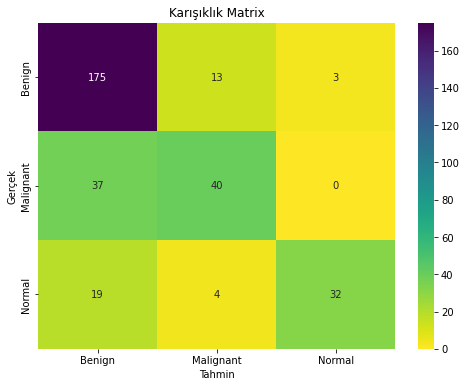

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

prediction_test = clf.predict(X_test)

# Model doğruluk

accuracy = metrics.accuracy_score(y_test, prediction_test)
print("Doğruluk: ", accuracy,"\n")
# Model sınıflandırma raporu
print("Sınıflandırma raporu:")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred),"\n")

# Predict on the entire test set
y_pred = clf.predict(X_test)

# Model karışıklık matriksi

print("Karışıklık Matriksi: ","\n",confusion_matrix(y_test, prediction_test),"\n")
# Karışıklık matriksi ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap='viridis_r', fmt='g',
            xticklabels=[orijinal_etiketler[0].capitalize(), orijinal_etiketler[1].capitalize(), orijinal_etiketler[2].capitalize()],
            yticklabels=[orijinal_etiketler[0].capitalize(), orijinal_etiketler[1].capitalize(), orijinal_etiketler[2].capitalize()])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrix')
plt.show()

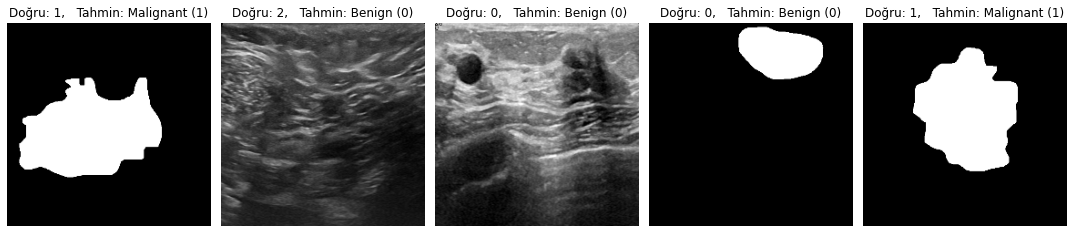

In [23]:
# Test verisinden rastgele sınıf getirme
# Tahminler her bir etikerin değerini alır True değer etiketlerin indeksine göre alınır. Eğer True ve Tahmin uyuşmuyorsa Hatalı tahmin yapmıştır.
num_samples_to_display = 5  # Number of random samples to display
random_indices = np.random.choice(X_test.shape[0], num_samples_to_display, replace=False)

# İlgili görselleri, kesin doğruluk etiketlerini ve tahmin edilen etiketleri alma
images_to_display = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = clf.predict(images_to_display)

class_labels = ["benign", "malignant", "normal"]
                  #"0"        #1          #2
# Görüntüleri temel gerçekleri ve tahmin edilen etiketleriyle birlikte görüntüleme
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images_to_display[i].reshape(yukseklik, genislik, kanal))  # Görüntğ yeniden şekillendirme
    plt.title(f"Doğru: {true_labels[i]},   Tahmin: {class_labels[predicted_labels[i]].capitalize()} ({predicted_labels[i]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

Test Doğruluk:  0.6842105263157895 

Sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       191
           1       0.59      0.49      0.54        77
           2       0.61      0.71      0.66        55

    accuracy                           0.68       323
   macro avg       0.65      0.65      0.65       323
weighted avg       0.68      0.68      0.68       323

Karışıklık Matriksi:  
 [[175  13   3]
 [ 37  40   0]
 [ 19   4  32]] 



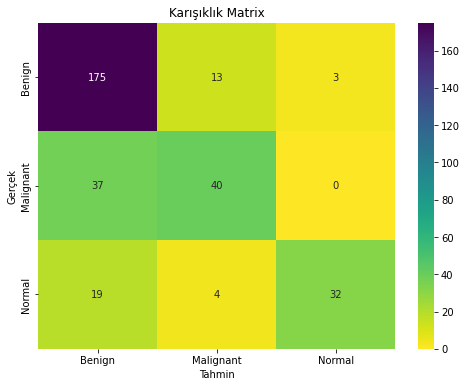

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# KNeighborsClassifier modelini oluşturma (k=3 kullanıldı)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Modeli eğitme
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = knn_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Doğruluk: ", test_accuracy,"\n")

print("Sınıflandırma raporu:")
print(classification_report(y_test, y_pred))

print("Karışıklık Matriksi: ","\n",confusion_matrix(y_test, prediction_test),"\n")
# # Karışıklık matriksi ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap='viridis_r', fmt='g',
            xticklabels=[orijinal_etiketler[0].capitalize(), orijinal_etiketler[1].capitalize(), orijinal_etiketler[2].capitalize()],
            yticklabels=[orijinal_etiketler[0].capitalize(), orijinal_etiketler[1].capitalize(), orijinal_etiketler[2].capitalize()])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrix')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# parametreler
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# grid seach performansı
grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# en iyi parametre
best_params = grid_search.best_params_

In [26]:
# en iyi parametre getirme
best_params

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

Eğitim Doğruluk Oranı: 0.9976708074534162

Test Doğruluk Oranı: 0.6501547987616099

Test seti içinde sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       191
           1       0.42      0.42      0.42        77
           2       0.67      0.71      0.69        55

    accuracy                           0.65       323
   macro avg       0.61      0.62      0.61       323
weighted avg       0.65      0.65      0.65       323


Test seti içindeki Karışıklık Matrix:
[[139  36  16]
 [ 42  32   3]
 [  7   9  39]]


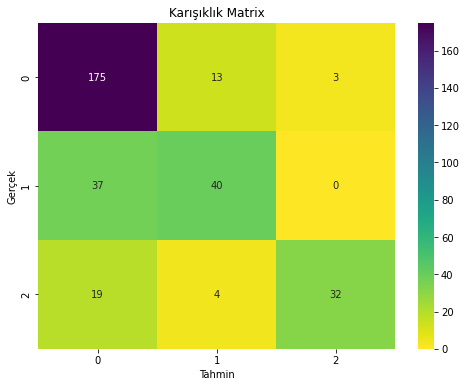

In [27]:
# Karar ağaç modeli
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf2 = DecisionTreeClassifier(random_state=42 , criterion='entropy', max_depth=None ,min_samples_split= 2)
clf2.fit(X_train, y_train)
# Model eğitme
y_pred = clf.predict(X_test)

# Eğtim doğruluk
y_train_pred = clf2.predict(X_train)

# Eğtim doğruluk
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Doğruluk Oranı:", train_accuracy)


y_test_pred = clf2.predict(X_test)

# Test doğruluk
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Doğruluk Oranı:", test_accuracy)

# Test seti sınıflandırma raporu
print("\nTest seti içinde sınıflandırma raporu:")
print(classification_report(y_test, y_test_pred))

# Karışıklık matriksi
print("\nTest seti içindeki Karışıklık Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Karışıklık matriksi ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis_r', fmt='g')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrix')
plt.show()

In [28]:
# veri kümesi oluşturmak için boyut,yükseklik ve genişlik değerlerimizi ayarlıyoruz
boyut = 32
resim_yukseklik = 224
resim_genislik = 224

In [29]:
# veri kümesi oluşturma
from tensorflow.keras.utils import image_dataset_from_directory
tahmin_verisi = image_dataset_from_directory(
                  veri_listesi,
                  validation_split=0.2, # doğrulama %20
                  subset="training", # doğrulama dışında kalan eğitim verisi alma
                  seed=123,
                  image_size=(resim_yukseklik, resim_genislik), # giriş görüntüleri boyutu
                  batch_size=boyut)


dogrulama_verisi = image_dataset_from_directory(veri_listesi,
                                        validation_split=0.2, #doğrulama %20
                                        subset="validation", # belirli oranda ayrılmış doğrulama verisi alma
                                        seed=123,
                                        image_size=(resim_yukseklik,resim_genislik), # giriş görüntüleri boyutu
                                        batch_size=boyut)

Found 1611 files belonging to 3 classes.
Using 1289 files for training.
Found 1611 files belonging to 3 classes.
Using 322 files for validation.


In [30]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(resim_yukseklik, resim_genislik, 3)), # piksel değerlerini standartlaştırma, RGB için 3
    
  layers.Conv2D(16, 3, padding="same", activation="relu"), # 16 filtre ile 3x3 evrişim yapar
  layers.MaxPooling2D(), # görüntü boyutlarını küçültme
    
  layers.Conv2D(32, 3, padding="same", activation="relu"), # 32 filtre ile 3x3 evrişim yapar
  layers.MaxPooling2D(),  # görüntü boyutlarını küçültme
    
  layers.Conv2D(64, 3, padding="same", activation="relu"), # 64 filtre ile 3x3 evrişim yapar
  layers.MaxPooling2D(),  # görüntü boyutlarını küçültme
    
  layers.Dropout(0.5), # Düşük ağırlıklı katman "overfitting" düşürülmesi
  layers.Flatten(), # Evrişim ve havulama katmanlarının çıktılarını düzleştirme
  layers.Dense(128, activation="relu"), # ilk katman 128 nöron ve relu aktivasyonu
  layers.Dense(3,activation="softmax") # ikinci katman 3 nöron ve softmax aktivasyonu
])

In [31]:
# Model derleme
import tensorflow.keras.metrics as metrics
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [32]:
# Model eğitim
epochs = 32
history = model.fit(tahmin_verisi,
                    epochs=epochs,
                    validation_data=dogrulama_verisi, 
                    batch_size=boyut)

Epoch 1/32


c:\users\ibrah\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 [==============================] - 31s 741ms/step - loss: 0.9894 - accuracy: 0.5190 - val_loss: 0.8642 - val_accuracy: 0.4907
Epoch 2/32
41/41 [==============================] - 32s 773ms/step - loss: 0.6994 - accuracy: 0.6982 - val_loss: 0.7246 - val_accuracy: 0.6957
Epoch 3/32
41/41 [==============================] - 31s 732ms/step - loss: 0.5562 - accuracy: 0.7541 - val_loss: 0.6520 - val_accuracy: 0.7484
Epoch 4/32
41/41 [==============================] - 32s 777ms/step - loss: 0.3711 - accuracy: 0.8503 - val_loss: 0.7483 - val_accuracy: 0.7453
Epoch 5/32
41/41 [==============================] - 34s 816ms/step - loss: 0.2735 - accuracy: 0.8875 - val_loss: 0.7719 - val_accuracy: 0.7826
Epoch 6/32
41/41 [==============================] - 35s 857ms/step - loss: 0.1889 - accuracy: 0.9348 - val_loss: 0.8283 - val_accuracy: 0.7950
Epoch 7/32
41/41 [==============================] - 34s 819ms/step - loss: 0.1411 - accuracy: 0.9535 - val_loss: 1.0731 - val_accuracy: 0.7733
Epoch 8/32

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

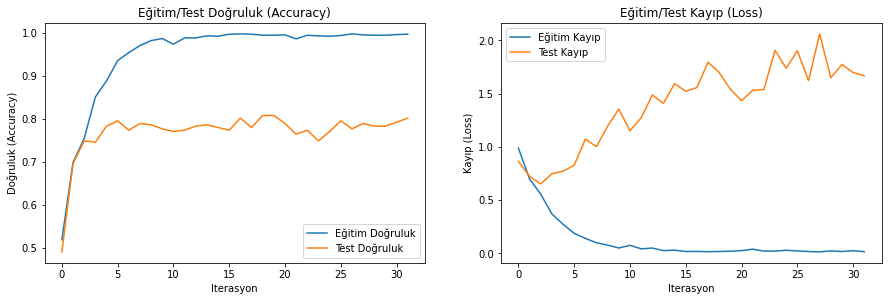

In [34]:
# Elde edilen kayıp ve doğruluk grafiği
acc = history.history["accuracy"]
val_acc =  history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(epochs_range,acc,label="Eğitim Doğruluk")
plt.plot(epochs_range,val_acc,label="Test Doğruluk")
plt.title("Eğitim/Test Doğruluk (Accuracy)")
plt.ylabel("Doğruluk (Accuracy)")
plt.xlabel("Iterasyon")
plt.legend()

plt.subplot(3,2,2)
plt.plot(epochs_range,loss,label="Eğitim Kayıp")
plt.plot(epochs_range,val_loss,label="Test Kayıp")
plt.title("Eğitim/Test Kayıp (Loss)")
plt.ylabel("Kayıp (Loss)")
plt.xlabel("Iterasyon")
plt.legend()
plt.show()

In [35]:
# Modelin performans değerlendirilmesi (kayıp ve doğrulama) değerleri
model.evaluate(tahmin_verisi)

41/41 [==============================] - 6s 135ms/step - loss: 0.0077 - accuracy: 0.9984


[0.007710200268775225, 0.9984484314918518]

In [36]:
# Model, katman özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

1/1 [==============================] - 0s 21ms/step


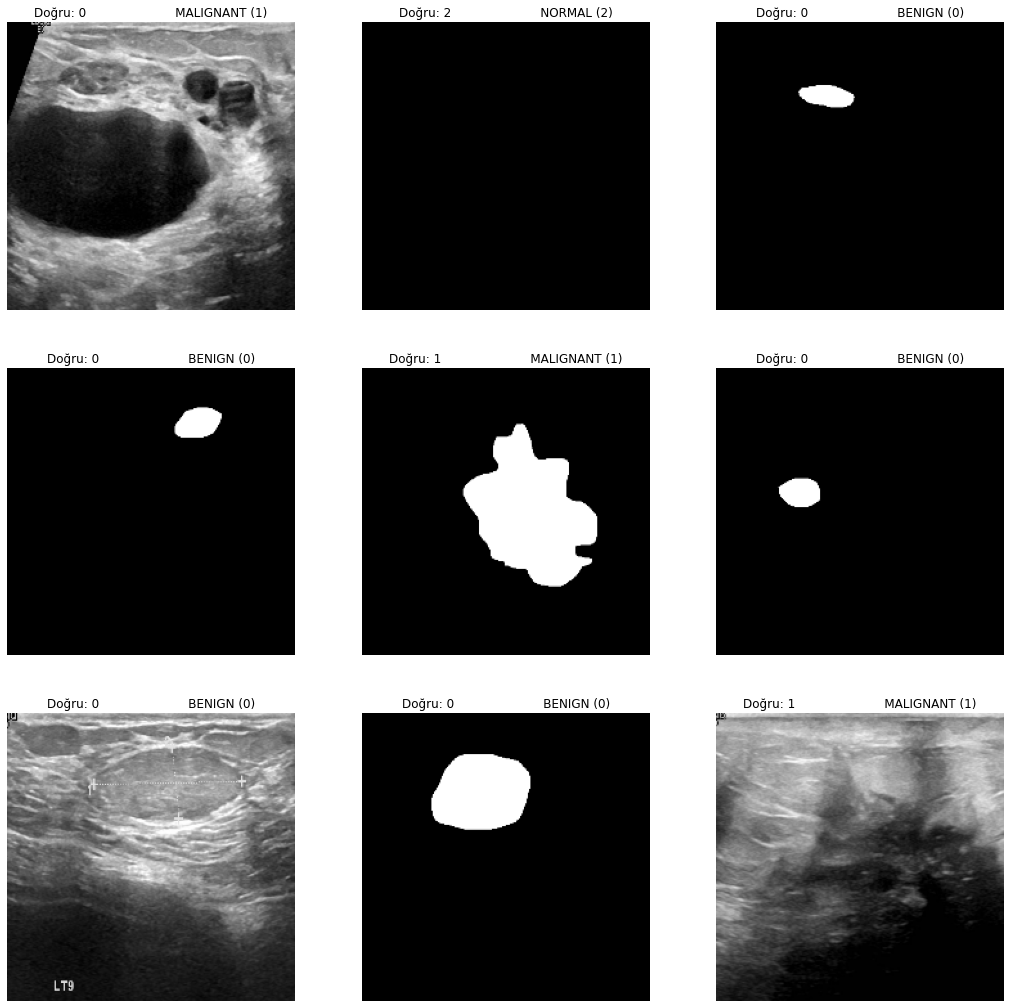

In [37]:
# Veri kümesinden alınan görüntüler üzerinde model tahmin değerlendirme ve sonuçların görselleştirilmesi
# Tahminler doğruysa o sınıfın etiket numarası yazılacak eğer tahminler doğru değil ise -1 yazacak
plt.figure(figsize=(18, 18))
sinif = tahmin_verisi.class_names

for goruntu, etiket in dogrulama_verisi.take(1):
    for i in range(9):
        sonuc = etiket[i]
        
        ax = plt.subplot(3, 3, i + 1)
        resim1 = goruntu[i].numpy().astype("uint8")
        resim1 = tf.expand_dims(resim1, axis=0)
        
        tahminler = model.predict(resim1)
        tahmin_sinifi = np.argmax(tahminler)
        if sinif[tahmin_sinifi] == sinif[etiket[i]]:
            sonuc = etiket[i]
            
        plt.imshow(goruntu[i].numpy().astype("uint8"))
        plt.title(f"Doğru: {sonuc}                       {sinif[tahmin_sinifi].upper()} ({tahmin_sinifi})")
        plt.axis("off")